In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn 


# Data Acquisition

In [2]:
menu_item = pd.read_csv("MenuItem.csv")

menu_item.head(5)

,id,menu_page_id,price,high_price,dish_id,created_at,updated_at,xpos,ypos
0,1,1389,0.4,NaN,1.0,2011-03-28 15:00:44 UTC,2011-04-19 04:33:15 UTC,0.111429,0.254735
1,2,1389,0.6,NaN,2.0,2011-03-28 15:01:13 UTC,2011-04-19 15:00:54 UTC,0.438571,0.254735
2,3,1389,0.4,NaN,3.0,2011-03-28 15:01:40 UTC,2011-04-19 19:10:05 UTC,0.140000,0.261922
3,4,1389,0.5,NaN,4.0,2011-03-28 15:01:51 UTC,2011-04-19 19:07:01 UTC,0.377143,0.262720
4,5,3079,0.5,1.0,5.0,2011-03-28 15:21:26 UTC,2011-04-13 15:25:27 UTC,0.105714,0.313178


In [3]:
dish = pd.read_csv("Dish.csv")

dish.head(5)

,id,name,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
0,1,Consomme printaniere royal,NaN,8,9,1897,1927,0.20,0.4
1,2,Chicken gumbo,NaN,110,116,1895,1960,0.10,0.8
2,3,Tomato aux croutons,NaN,13,13,1893,1917,0.25,0.4
3,4,Onion au gratin,NaN,41,41,1900,1971,0.25,1.0
4,5,St. Emilion,NaN,66,68,1881,1981,0.00,18.0


In [4]:
menu_page = pd.read_csv("MenuPage.csv")

menu_page.head(5)

,id,menu_id,page_number,image_id,full_height,full_width,uuid
0,119,12460,1.0,1603595,7230.0,5428.0,510d47e4-2955-a3d9-e040-e00a18064a99
1,120,12460,2.0,1603596,5428.0,7230.0,510d47e4-2956-a3d9-e040-e00a18064a99
2,121,12460,3.0,1603597,7230.0,5428.0,510d47e4-2957-a3d9-e040-e00a18064a99
3,122,12460,4.0,1603598,7230.0,5428.0,510d47e4-2958-a3d9-e040-e00a18064a99
4,123,12461,1.0,1603591,7230.0,5428.0,510d47e4-2959-a3d9-e040-e00a18064a99


In [5]:
menu = pd.read_csv("Menu.csv")

menu.head(20)

,id,name,sponsor,event,venue,place,physical_description,occasion,notes,call_number,keywords,language,date,location,location_type,currency,currency_symbol,status,page_count,dish_count
0,12463,NaN,HOTEL EASTMAN,BREAKFAST,COMMERCIAL,"HOT SPRINGS, AR",CARD; 4.75X7.5;,EASTER;,NaN,1900-2822,NaN,NaN,1900-04-15,Hotel Eastman,NaN,NaN,NaN,complete,2,67
1,12464,NaN,REPUBLICAN HOUSE,[DINNER],COMMERCIAL,"MILWAUKEE, [WI];",CARD; ILLUS; COL; 7.0X9.0;,EASTER;,WEDGEWOOD BLUE CARD; WHITE EMBOSSED GREEK KEY ...,1900-2825,NaN,NaN,1900-04-15,Republican House,NaN,NaN,NaN,complete,2,34
2,12465,NaN,NORDDEUTSCHER LLOYD BREMEN,FRUHSTUCK/BREAKFAST;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,CARD; ILLU; COL; 5.5X8.0;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, STEAMSHIP A...",1900-2827,NaN,NaN,1900-04-16,Norddeutscher Lloyd Bremen,NaN,NaN,NaN,complete,2,84
3,12466,NaN,NORDDEUTSCHER LLOYD BREMEN,LUNCH;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,CARD; ILLU; COL; 5.5X8.0;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...",1900-2828,NaN,NaN,1900-04-16,Norddeutscher Lloyd Bremen,NaN,NaN,NaN,complete,2,63
4,12467,NaN,NORDDEUTSCHER LLOYD BREMEN,DINNER;,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,FOLDER; ILLU; COL; 5.5X7.5;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR SCEN...",1900-2829,NaN,NaN,1900-04-16,Norddeutscher Lloyd Bremen,NaN,NaN,NaN,complete,4,33
5,12468,NaN,CANADIAN PACIFIC RAILWAY COMPANY,[DINNER],COMMERCIAL,R.M.S. EMPRESS OF CHINA,CARD; ILLUS; COL; 4.75X7.25;,NaN,"ILLUS, RED AND WHITE CHECKERED FLAG;",1900-2831,NaN,NaN,1900-04-16,Canadian Pacific Railway Company,NaN,NaN,NaN,complete,2,37
6,12469,NaN,HOTEL NETHERLAND,SUPPER,COMMERCIAL,"NEW YORK, [NY];",CARD; ILLUS; COL; 6.0X8.75;,NaN,HOTEL CREST IN BLUE; PRICED MENU;,1900-2838,NaN,NaN,1900-04-16,Hotel Netherland,NaN,Dollars,$,complete,2,144
7,12470,NaN,NORDDEUTSCHER LLOYD BREMEN,FRUHSTUCK/BREAKFAST,COMMERCIAL,SCHNELLDAMPFER KAISER WILHELM DER GROSSE;,BROADSIDE; ILLUS; COL; 5.5X8.50;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, LIGHTHOUSE;...",1900-2839,NaN,NaN,1900-04-17,Norddeutscher Lloyd Bremen,NaN,NaN,NaN,complete,2,80
8,12471,NaN,NORDDEUTSCHER LLOYD BREMEN,LUNCH,COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,BROADSIDE; ILLUS; COL; 5.5X8.50;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, SAILING SHI...",1900-2840,NaN,NaN,1900-04-17,Norddeutscher Lloyd Bremen,NaN,NaN,NaN,complete,2,67
9,12472,NaN,NORDDEUTSCHER LLOYD BREMEN,[DINNER],COMMERCIAL,DAMPFER KAISER WILHELM DER GROSSE;,FOLDER; ILLUS; COL; 5.5X7.5;,NaN,"MENU IN GERMAN AND ENGLISH; ILLUS, HARBOR; LIG...",1900-2841,NaN,NaN,1900-04-17,Norddeutscher Lloyd Bremen,NaN,NaN,NaN,complete,4,29


# Data Filtering

In [6]:
# Combining All the csv files to form a single dataset

menu_item.join(dish,how="outer",lsuffix='dish_id', rsuffix='id')
menu_item.head()

,id,menu_page_id,price,high_price,dish_id,created_at,updated_at,xpos,ypos
0,1,1389,0.4,NaN,1.0,2011-03-28 15:00:44 UTC,2011-04-19 04:33:15 UTC,0.111429,0.254735
1,2,1389,0.6,NaN,2.0,2011-03-28 15:01:13 UTC,2011-04-19 15:00:54 UTC,0.438571,0.254735
2,3,1389,0.4,NaN,3.0,2011-03-28 15:01:40 UTC,2011-04-19 19:10:05 UTC,0.140000,0.261922
3,4,1389,0.5,NaN,4.0,2011-03-28 15:01:51 UTC,2011-04-19 19:07:01 UTC,0.377143,0.262720
4,5,3079,0.5,1.0,5.0,2011-03-28 15:21:26 UTC,2011-04-13 15:25:27 UTC,0.105714,0.313178


# Data Parsing

# Data Mining

# Data Representation

### Maps Visualization

In [9]:
from geopy.geocoders import Nominatim

menu1= menu.values.tolist()
locations = []

for i in range(100):

    try:
        location = menu1[i][5]
        location=location[:-1]
        
    except:
        continue
    locations.append(location)

locator = Nominatim(user_agent="H")

coors = []

for i in range(100):

    try:
        locate = locator.geocode(locations[i])
        coors.append([locate.latitude,locate.longitude])
    except:
        continue


print(coors)
print(len(coors))

[[24.1053166, 55.7491741], [40.7127281, -74.0060152], [40.7050005, -74.0102731], [40.7127281, -74.0060152], [55.9508879, -3.1905922], [55.9508879, -3.1905922], [40.7127281, -74.0060152], [7.9768, 8.7127], [48.2083537, 16.3725042], [42.635008897987646, -73.73941720239189], [46.6083443, 6.2310684], [18.4520035, -66.07145997812117], [43.8119467, 3.8133382], [64.5731537, 11.52803643954819], [40.741303, -73.989344], [43.8119467, 3.8133382], [39.7392364, -104.9848623], [42.3602534, -71.0582912], [42.6724491, -84.5388823], [40.84093215, -73.40830840088867], [51.9900836, 17.9168864], [51.5029222, -0.103458], [51.5029222, -0.103458], [51.5029222, -0.103458], [39.3642852, -74.4229351], [42.3602534, -71.0582912], [34.276942, -119.2998713], [34.276942, -119.2998713], [41.8239891, -71.4128343], [32.6834758, -117.18574218495593], [-11.1852914, -67.3677564], [41.6518884, -82.8186814], [40.7127281, -74.0060152], [43.8119467, 3.8133382], [42.3651141, -71.0089335], [40.7576272, -73.9159824], [36.1622296

In [10]:
import folium

print(len(coors))
map = folium.Map(location=[40.7127281, -70.0060152], zoom_start=12)
for point in range(0, len(coors)):
    folium.Marker(coors[point]).add_to(map)

map

43


### Word Cloud

In [6]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')
stopwords = set(STOPWORDS) 

dish_names = dish.values.tolist()
names = ''

for i in range(len(dish_names)):
    names+= dish_names[i][1]

print(names)

words = []
#for name in names:
#    words.append(name.split())
print(words)


t De PoireEaux-de-vie de Framboise et de PoireGreen Turtle a l'anglaise, Olives, Celeri, Radis, Amandes SaleesSuprème of Striped Bass, Normande, Potatoes en CroquettesTournedes de Filet de Boeuf, Princesse, Asparagus Tips, Haricot VertsMousse de Jambon de Virginia, Epinards a la CremePhiladelphia Squab Rôti au Cresson, Salade de SaisonGlace de Fantaisie, Frandises, Fruits AssortisLoups de Mer bouilli sauce Normande, Pommes natureCanards sauvages rotis, Salade de SaisonGolden Fried Butterfly Shrimps, Tartar Sauce, French Fried Onions, French Fried 'Taters, Tossed Salas Golden Fried Butterfly Shrimps in a Basket, Tartar Sauce, French Fried Onions, French Fried 'Taters, Tossed Salasd, Dessert, BeverageFish and Chips in a Basket, Tartar Sauce, French Fried Onions, French Fried 'Taters,  Tossed Salad, Dessert, BeverageGolden Fried Butterfly Shrimps in a Basket, Tartar Sauce, French Fried Onions, French Fried 'Taters, Tossed Salad, Dessert, BeverageShishkebab Beef on a Shining Spear, Steamed

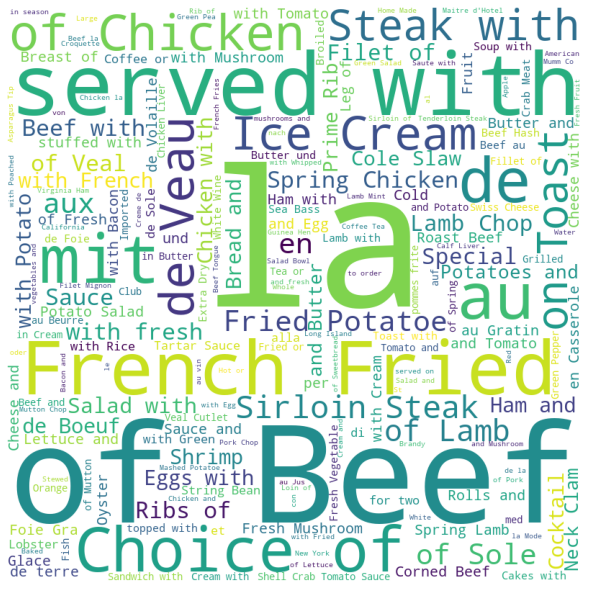

In [7]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(names) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Data Refining

# Data interaction